# Merge Files

In [1]:
import os

# Set the directory path
directory = "/Users/shaistasyeda/Desktop/DataSet/TextFiles"

# Create a new file to store the merged contents
for year in range(1803, 2007):
    output_file_path = f"{year}-merged.txt"

    with open(output_file_path, "w") as output_file:
        # Loop through all files in the directory
        for filename in os.listdir(directory):
            # Check if the filename contains the year
            if str(year) in filename:
                # Open the file and read the contents
                with open(os.path.join(directory, filename), "r") as file:
                    contents = file.read()
                    # Write the contents to the merged file
                    output_file.write(contents)

    print(f'Merged data for {year} and saved to {output_file_path}')

Merged data for 1803 and saved to 1803-merged.txt
Merged data for 1804 and saved to 1804-merged.txt
Merged data for 1805 and saved to 1805-merged.txt
Merged data for 1806 and saved to 1806-merged.txt
Merged data for 1807 and saved to 1807-merged.txt
Merged data for 1808 and saved to 1808-merged.txt
Merged data for 1809 and saved to 1809-merged.txt
Merged data for 1810 and saved to 1810-merged.txt
Merged data for 1811 and saved to 1811-merged.txt
Merged data for 1812 and saved to 1812-merged.txt
Merged data for 1813 and saved to 1813-merged.txt
Merged data for 1814 and saved to 1814-merged.txt
Merged data for 1815 and saved to 1815-merged.txt
Merged data for 1816 and saved to 1816-merged.txt
Merged data for 1817 and saved to 1817-merged.txt
Merged data for 1818 and saved to 1818-merged.txt
Merged data for 1819 and saved to 1819-merged.txt
Merged data for 1820 and saved to 1820-merged.txt
Merged data for 1821 and saved to 1821-merged.txt
Merged data for 1822 and saved to 1822-merged.txt


In [2]:
import os
import re

In [3]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install Cython

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install fasttext-wheel

Note: you may need to restart the kernel to use updated packages.


In [6]:
import nltk
import string
import os 
import fasttext
import threading
import editdistance
import multiprocessing as mp
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from multiprocessing import Pool

In [7]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shaistasyeda/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shaistasyeda/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Clean the files

In [35]:
# Function to clean text 
def clean_text(text):
    # Convert to lowercase
    text_lower = text.lower()

    # Remove punctuation
    text_no_punct = text_lower.translate(str.maketrans('', '', string.punctuation))

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    # Male pronouns
    male_pronouns = ["he", "him", "his", "himself"]

    # Female pronouns
    female_pronouns = ["she", "her", "hers", "herself"]

    # Exclude male and female pronouns from the stop words
    stop_words -= set(male_pronouns + female_pronouns)
    words = text_no_punct.split()
    cleaned_words = [word for word in words if word.lower() not in stop_words]

    return ' '.join(cleaned_words)

In [37]:
# Get the English stop words
stop_words = set(stopwords.words('english'))
# Male pronouns
male_pronouns = ["he", "him", "his", "himself"]

# Female pronouns
female_pronouns = ["she", "her", "hers", "herself"]

# Exclude male and female pronouns from the stop words
stop_words -= set(male_pronouns + female_pronouns)
# Print the stop words
print(stop_words)

{'do', 'until', 'how', 'about', 'haven', 's', "shouldn't", 'was', 'most', 'mightn', 'other', 'wasn', 'during', 'shouldn', 'through', 'these', "that'll", "hasn't", 'me', "she's", "weren't", 'its', 'at', 'here', 'yourselves', 'such', 'very', 'mustn', 'under', 'to', 'between', 'being', 'them', 'once', "needn't", 'won', 'yourself', 'each', 'shan', 'if', 'and', 'which', "won't", 'are', 'needn', 'just', "isn't", 'hadn', 'weren', 'ma', 'that', 'up', 'doesn', 'no', "you've", 'than', 'before', 'aren', 'ain', 'did', 'on', 'the', 'o', 'a', 'out', 'what', "didn't", 'down', 'as', 'itself', 't', 'so', 'is', 'couldn', 'myself', 'those', 'has', 'of', 'in', 'all', 'yours', 'why', 'when', 'am', 'with', 'after', "couldn't", 'isn', "don't", 'you', "you'd", 'my', 'only', 'y', "wasn't", "mightn't", 'didn', 'for', 'be', 'an', 'this', 'll', 'hasn', "aren't", 'themselves', 'whom', 'against', 've', 'does', 'should', 'theirs', 'but', 'have', 'over', "you'll", 'now', 'i', 'd', 'below', 'same', 'own', 'where', 'in

In [38]:
input_directory = "/Users/shaistasyeda/Desktop/DataSet/merged-files-each-year"
output_directory = "/Users/shaistasyeda/Desktop/DataSet/CleanedFiles-each-year"

# Iterate over each year and clean the corresponding merged file
for year in range(1803, 2007):
    input_file_path = os.path.join(input_directory, f"{year}-merged.txt")
    output_file_path = os.path.join(output_directory, f"{year}_cleaned.txt")

    # Ensure the output directory exists
    os.makedirs(output_directory, exist_ok=True)

    with open(input_file_path, "r") as input_file:
        contents = input_file.read()

        # Clean the text
        cleaned_text = clean_text(contents)

        # Save the cleaned text to the output file
        with open(output_file_path, "w") as output_file:
            output_file.write(cleaned_text)

    print(f'Cleaned data for {year} and saved to {output_file_path}')

Cleaned data for 1803 and saved to /Users/shaistasyeda/Desktop/DataSet/CleanedFiles-each-year/1803_cleaned.txt
Cleaned data for 1804 and saved to /Users/shaistasyeda/Desktop/DataSet/CleanedFiles-each-year/1804_cleaned.txt
Cleaned data for 1805 and saved to /Users/shaistasyeda/Desktop/DataSet/CleanedFiles-each-year/1805_cleaned.txt
Cleaned data for 1806 and saved to /Users/shaistasyeda/Desktop/DataSet/CleanedFiles-each-year/1806_cleaned.txt
Cleaned data for 1807 and saved to /Users/shaistasyeda/Desktop/DataSet/CleanedFiles-each-year/1807_cleaned.txt
Cleaned data for 1808 and saved to /Users/shaistasyeda/Desktop/DataSet/CleanedFiles-each-year/1808_cleaned.txt
Cleaned data for 1809 and saved to /Users/shaistasyeda/Desktop/DataSet/CleanedFiles-each-year/1809_cleaned.txt
Cleaned data for 1810 and saved to /Users/shaistasyeda/Desktop/DataSet/CleanedFiles-each-year/1810_cleaned.txt
Cleaned data for 1811 and saved to /Users/shaistasyeda/Desktop/DataSet/CleanedFiles-each-year/1811_cleaned.txt
C

# Function for male pronoun count

In [23]:
def count_male_pronouns(file_path):
    with open(file_path, 'r') as file:
        contents = file.read()
        # regular expression pattern for a list of male pronouns
        male_pronouns = re.findall(r'\b(he|him|his|himself)\b', contents, flags=re.IGNORECASE)
        return len(male_pronouns)

# Function for female pronoun count

In [24]:
def count_female_pronouns(file_path):
    with open(file_path, 'r') as file:
        contents = file.read()
        # regular expression pattern for a list of female pronouns
        female_pronouns = re.findall(r'\b(she|her|hers|herself)\b', contents, flags=re.IGNORECASE)
        return len(female_pronouns)

# Calculating pronoun count for each year 

In [25]:
import pandas as pd

In [39]:
# The folder path of cleaned files
folder_path = '/Users/shaistasyeda/Desktop/DataSet/CleanedFiles-each-year'

# Initialize an empty DataFrame
df = pd.DataFrame(columns=['Year', 'Male Count', 'Female Count'])

# Iterate over the years
for year in range(1803, 2007):
    file_name = f'{year}_cleaned.txt'
    file_path = os.path.join(folder_path, file_name)

    # Check if the file exists
    if os.path.exists(file_path):
        # Perform the pronoun count operations
        male_pronoun_count = count_male_pronouns(file_path)
        female_pronoun_count = count_female_pronouns(file_path)

        # Update the DataFrame
        df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)

        # Print the results
        print(year, male_pronoun_count, female_pronoun_count)

        # Remove the processed file
        os.remove(file_path)
    else:
        print(f"File not found: {file_path}")

/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)
/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)
/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_i

1803 4259 53
1804 11138 139
1805 22119 502


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)
/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)
/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_i

1806 16623 202
1807 12352 545
1808 9732 353


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)
/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)
/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_i

1809 36381 5090
1810 7180 153
1811 39301 864


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)
/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)
/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_i

1812 37860 1890
1813 8913 388
1814 9015 281
1815 20441 890
1816 0 0


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)
/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1817 21476 300
1818 15303 211


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)
/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1819 50871 888
1820 41458 11795


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)
/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1821 26310 2704
1822 47976 2278


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)
/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)
/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_i

1823 40928 2197
1824 33349 1274
1825 16843 350


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)
/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)
/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_i

1826 26702 410
1827 14041 152
1828 33959 576
1829 0 0


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1830 67410 1873


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1831 76013 1143


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1832 76136 1632


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1833 93863 1323


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1834 87301 1850


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1835 62561 636


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1836 70485 2336


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)
/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1837 50432 2592
1838 45722 1832


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1839 68283 2795


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1840 76141 3009


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1841 58186 2523


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1842 62144 2031


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)
/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1843 67950 3372
1844 24502 1144


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1845 64598 2677


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1846 81123 3096


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1847 75555 4649


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1848 63045 3914


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1849 48373 2941


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)
/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1850 56689 2742
1851 38940 1840


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1852 61157 2828


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1853 52349 2390


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1854 61598 3276


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1855 66258 3332


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1856 55055 3215


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1857 51098 4463


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)
/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1858 61463 3388
1859 25583 2233


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1860 42417 1627


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1861 64998 3719


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1862 47954 2860


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1863 58061 4614


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1864 43234 3680


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1865 59762 3519


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1866 44263 2022


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1867 63804 3623


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1868 56300 3685


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1869 52827 2374


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1870 82906 4005


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1871 52187 2761


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1872 63720 3342


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)
/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1873 63450 4806
1874 36226 2077


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1875 58087 2542


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1876 53294 3631


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1877 66192 4737


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)
/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1878 55925 5493
1879 35008 1525


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)
/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1880 51169 2463
1881 38156 1460


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1882 34162 1376


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)
/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1883 49739 1666
1884 30601 2323


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1885 39349 1695


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1886 39764 2909


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1887 42896 2287


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1888 55686 2063


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1889 33074 2409


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)
/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1890 23796 2649
1891 8777 685


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)
/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1892 18637 1710
1893 19552 879


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1894 59776 2326


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1895 60052 2838


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1896 61498 1775


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)
/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1897 41145 2510
1898 15021 1653


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1899 14074 987


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)
/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1900 21786 1623
1901 24055 1417


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)
/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1902 67980 1101
1903 15743 660


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)
/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1904 40536 470
1905 16247 194


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)
/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1906 38872 460
1907 36676 661


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)
/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1908 34880 649
1909 12698 474


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1910 20168 1074


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)
/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1911 26475 1603
1912 21102 992


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)
/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1913 41582 2316
1914 11693 390


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)
/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1915 18820 1062
1916 12831 381


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1917 14959 332


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1918 33357 2686


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1919 49535 1581


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)
/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1920 19628 769
1921 8459 436


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)
/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1922 20341 1499
1923 8656 834


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)
/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1924 24575 1838
1925 15158 762


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1926 27477 761


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)
/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1927 30035 1027
1928 16814 391


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1929 13468 1029


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)
/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1930 30150 3373
1931 19869 1206


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1932 24652 712


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1933 19309 2300


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1934 21116 550


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1935 22763 1343


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1936 35068 1268


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1937 34436 1690


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1938 27806 1436


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1939 21195 1031


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)
/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1940 20600 1132
1941 16488 809


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1942 19483 769


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1943 29690 1969


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1944 33162 1549


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1945 26352 1422


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1946 36095 1867


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1947 64319 2768


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1948 51141 2027


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1949 38892 3484


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1950 36815 1790


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1951 26290 1712


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1952 51426 3891


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1953 35038 4159


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1954 35595 3318


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1955 37733 2706


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)
/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1956 50752 4915
1957 39993 4223


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1958 36197 3677


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)
/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1959 32586 2997
1960 45145 3889


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1961 38845 3122


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1962 52321 4401


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1963 45130 4080


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1964 41188 4177


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1965 47495 4948


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1966 53665 8585


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1967 57254 8214


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1968 52601 5935


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1969 62061 7741


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1970 42145 4157


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1971 62408 7594


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1972 73477 6201


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1973 49263 5017


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1974 33351 6330


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1975 52674 7648


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1976 75284 7758


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1977 88973 7770


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1978 82742 9124


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1979 59929 7231


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1980 75069 10304


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1981 58937 11345


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1982 68302 14102


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1983 62767 11466


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1984 57627 14890


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1985 77823 9742


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1986 66516 8499


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1987 80301 8021


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1988 70623 9802


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1989 74178 9406


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1990 79364 9129


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1991 56014 5543


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1992 70569 10919


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1993 52547 9658


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1994 55330 10718


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1995 71705 15111


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1996 52746 10299


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1997 45274 9948


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1998 56495 14195


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


1999 49268 10860


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


2000 66224 13477


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


2001 36183 11053


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


2002 41544 14066


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)


2003 39970 12537
2004 31487 11253
2005 1741 1891
2006 4 4


/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)
/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_index=True)
/var/folders/g5/dmdm26xd0_s5m4_slz5jkxkw0000gn/T/ipykernel_14808/2157251.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Year': year, 'Male Count': male_pronoun_count, 'Female Count': female_pronoun_count}, ignore_i

In [50]:
print(df)

     Year Male Count Female Count Year Interval
0    1803       4259           53  [1800, 1810)
1    1804      11138          139  [1800, 1810)
2    1805      22119          502  [1800, 1810)
3    1806      16623          202  [1800, 1810)
4    1807      12352          545  [1800, 1810)
..    ...        ...          ...           ...
199  2002      41544        14066  [2000, 2010)
200  2003      39970        12537  [2000, 2010)
201  2004      31487        11253  [2000, 2010)
202  2005       1741         1891  [2000, 2010)
203  2006          4            4  [2000, 2010)

[204 rows x 4 columns]


In [41]:
import matplotlib.pyplot as plt

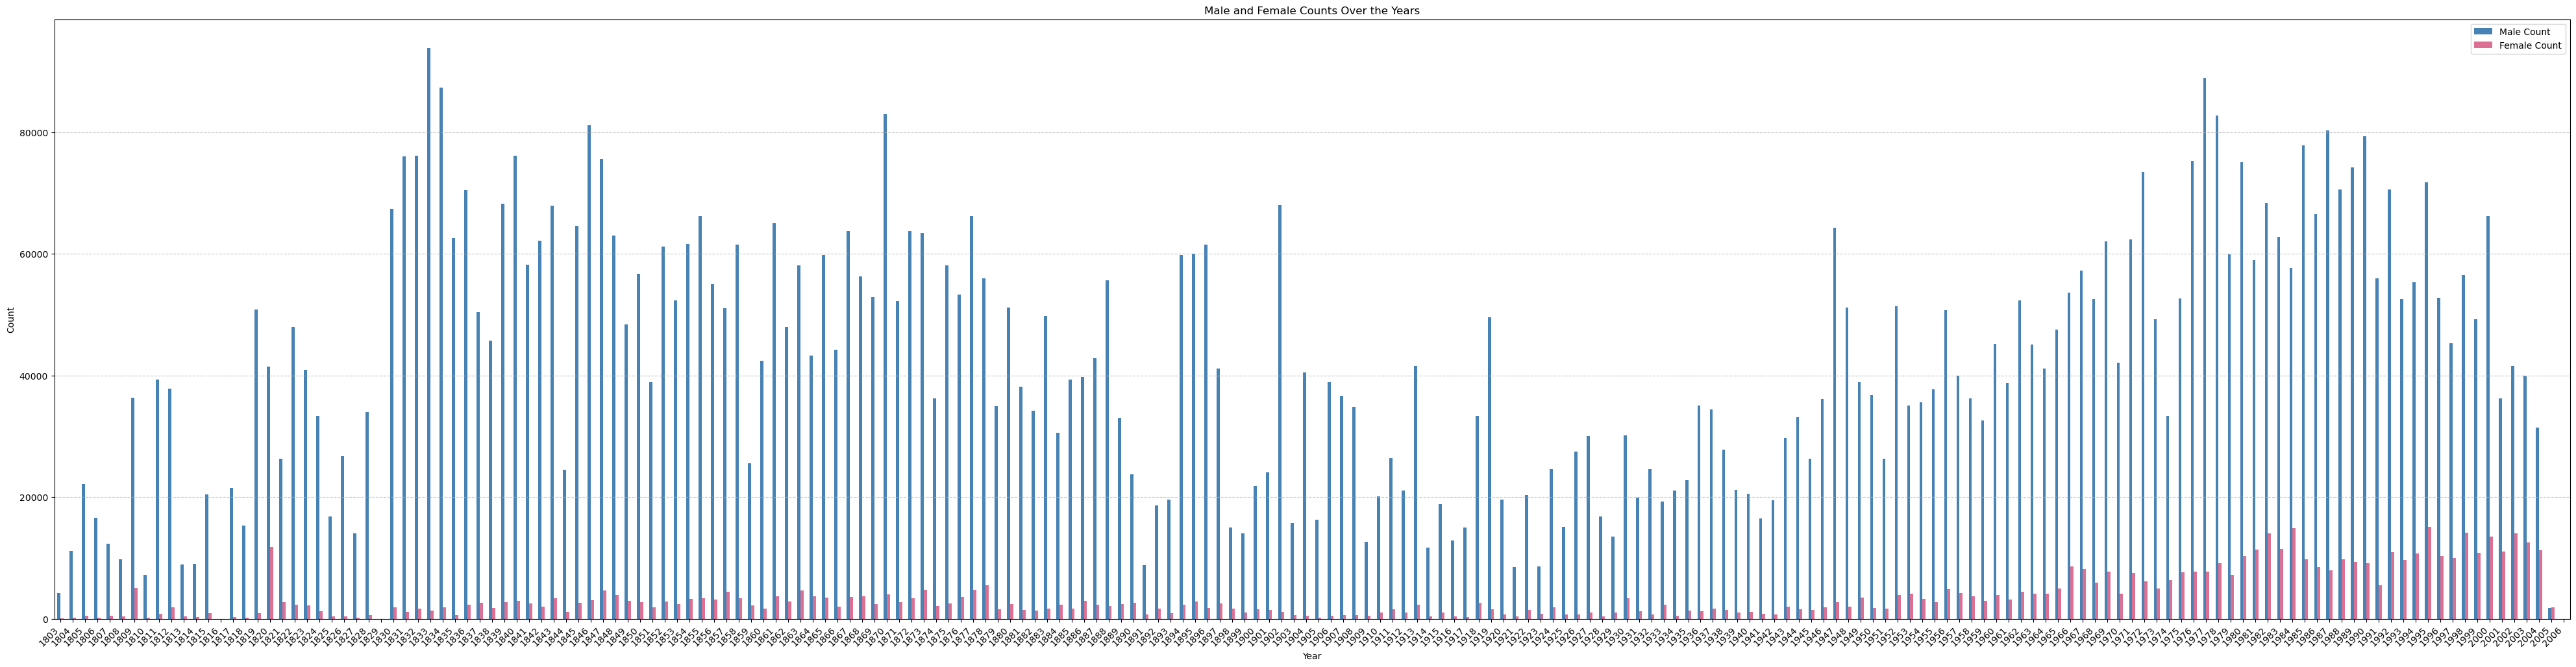

In [47]:
# Increase figure size
plt.figure(figsize=(50, 12))

# Plot the data
ax = df.plot(x="Year", y=["Male Count", "Female Count"], kind="bar", color=["steelblue", "palevioletred"], rot=45, ax=plt.gca())

# Customize x-axis labels 
ax.set_xticklabels(df["Year"], rotation=45, ha="right")

# Add grid lines 
ax.grid(axis="y", linestyle="--", alpha=0.7)

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Male and Female Counts Over the Years")

# Show the plot
plt.show()

<Figure size 1200x600 with 0 Axes>

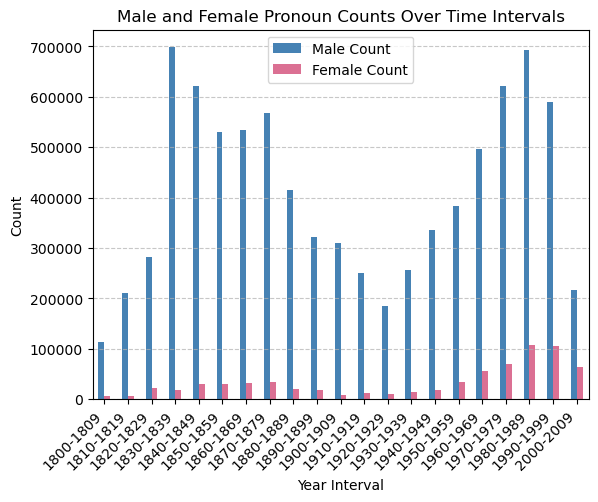

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a new column for the time intervals
df['Year Interval'] = pd.cut(df['Year'], bins=range(1800, 2011, 10), right=False)

# Group by the time intervals and sum the counts
grouped_df = df.groupby('Year Interval').agg({'Male Count': 'sum', 'Female Count': 'sum'}).reset_index()

# Plot the data
plt.figure(figsize=(12, 6))
ax = grouped_df.plot(x="Year Interval", y=["Male Count", "Female Count"], kind="bar", color=["steelblue", "palevioletred"], rot=45)

# Customize x-axis labels
ax.set_xticklabels([f'{interval.left}-{interval.right-1}' for interval in grouped_df['Year Interval']], rotation=45, ha="right")

# Add grid lines
ax.grid(axis="y", linestyle="--", alpha=0.7)

# Add labels and title
plt.xlabel("Year Interval")
plt.ylabel("Count")
plt.title("Male and Female Pronoun Counts Over Time Intervals")

# Show the plot
plt.show()



In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('/Users/shaistasyeda/Desktop/DataSet/pronoun_count_df.csv')

In [4]:
df.head(5)

,Year,Male_Pronoun_Count,Female_Pronoun_Count
0,1803,4259,53
1,1804,11138,139
2,1805,22119,502
3,1806,16623,202
4,1807,12352,545


In [6]:
# Calculate the ratio of female pronouns to the total pronoun count
df['Total_Count'] = df['Male_Pronoun_Count'] + df['Female_Pronoun_Count']
df['Female_Ratio'] = df['Female_Pronoun_Count'] / df['Total_Count']

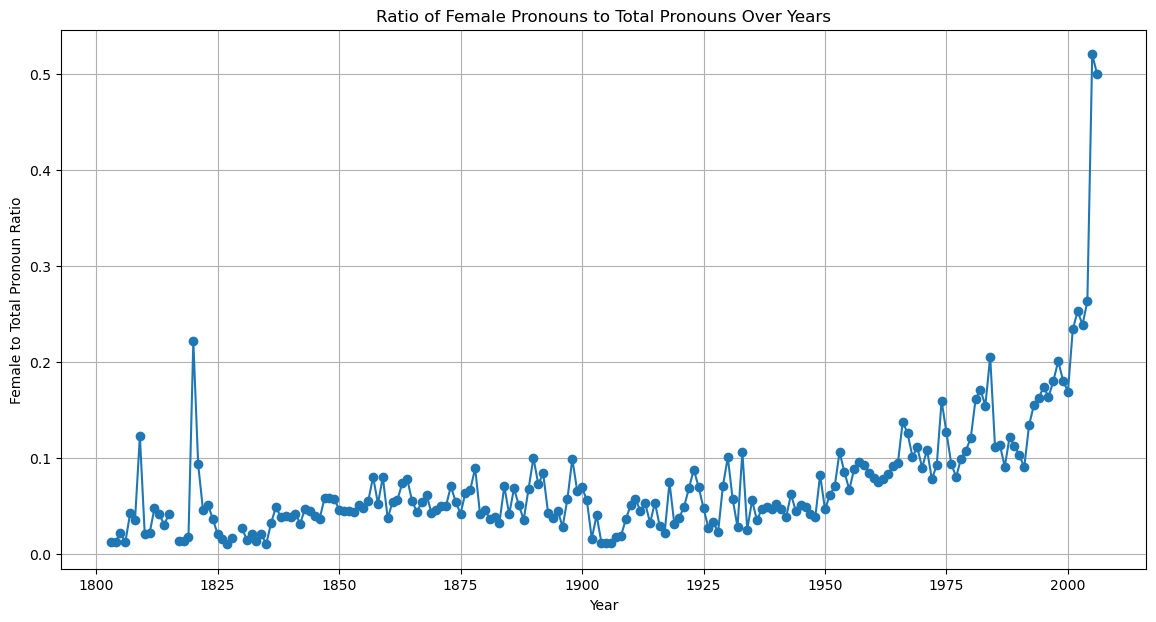

In [7]:
# Plot the ratio
plt.figure(figsize=(14, 7))
plt.plot(df['Year'], df['Female_Ratio'], marker='o')
plt.title('Ratio of Female Pronouns to Total Pronouns Over Years')
plt.xlabel('Year')
plt.ylabel('Female to Total Pronoun Ratio')
plt.grid(True)
plt.show()

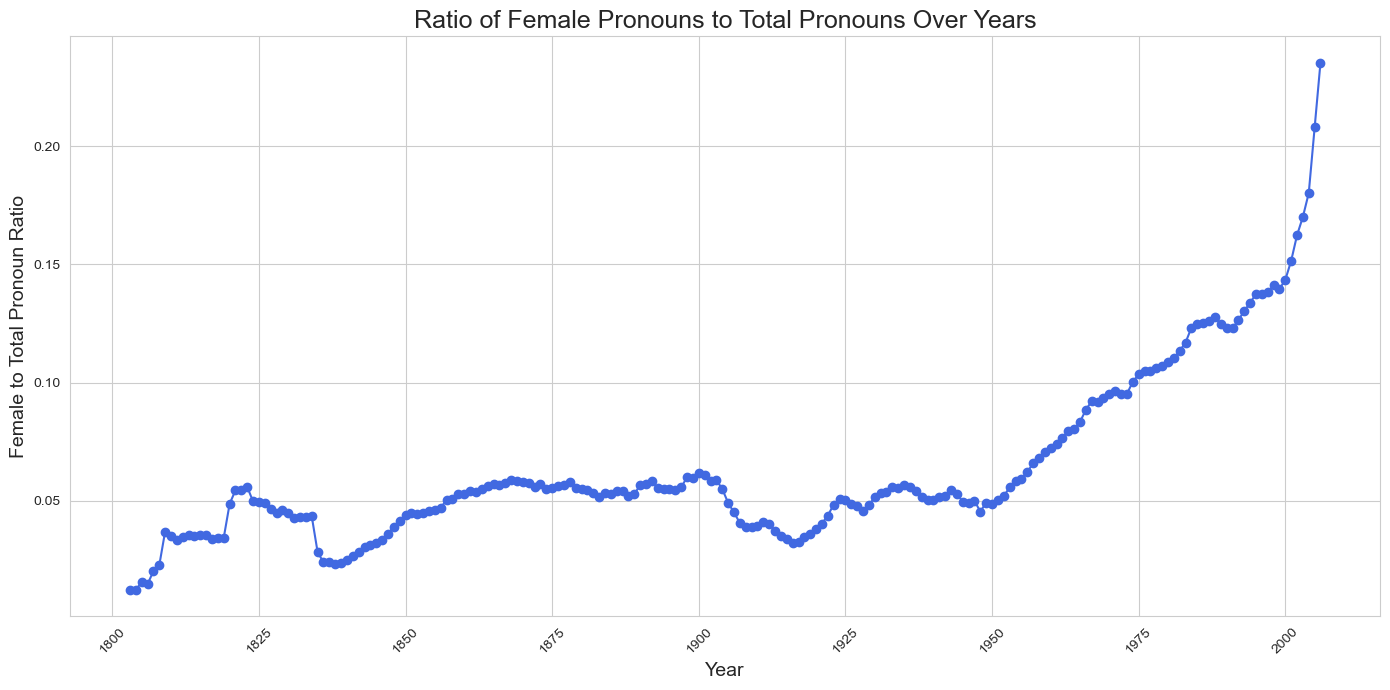

In [11]:
import seaborn as sns

sns.set_style("whitegrid")

# Create a larger plot
plt.figure(figsize=(14, 7))

rolling_window = 15 
plt.plot(df['Year'], df['Female_Ratio'].rolling(rolling_window, min_periods=1).mean(), marker='o', color='royalblue')

# Make the plot prettier
plt.title('Ratio of Female Pronouns to Total Pronouns Over Years', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Female to Total Pronoun Ratio', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()  

# Show the plot
plt.show()

In [12]:
df['Female_to_Male_Ratio'] = df['Female_Pronoun_Count'] / df['Male_Pronoun_Count'].replace({0:1})  # To avoid division by zero

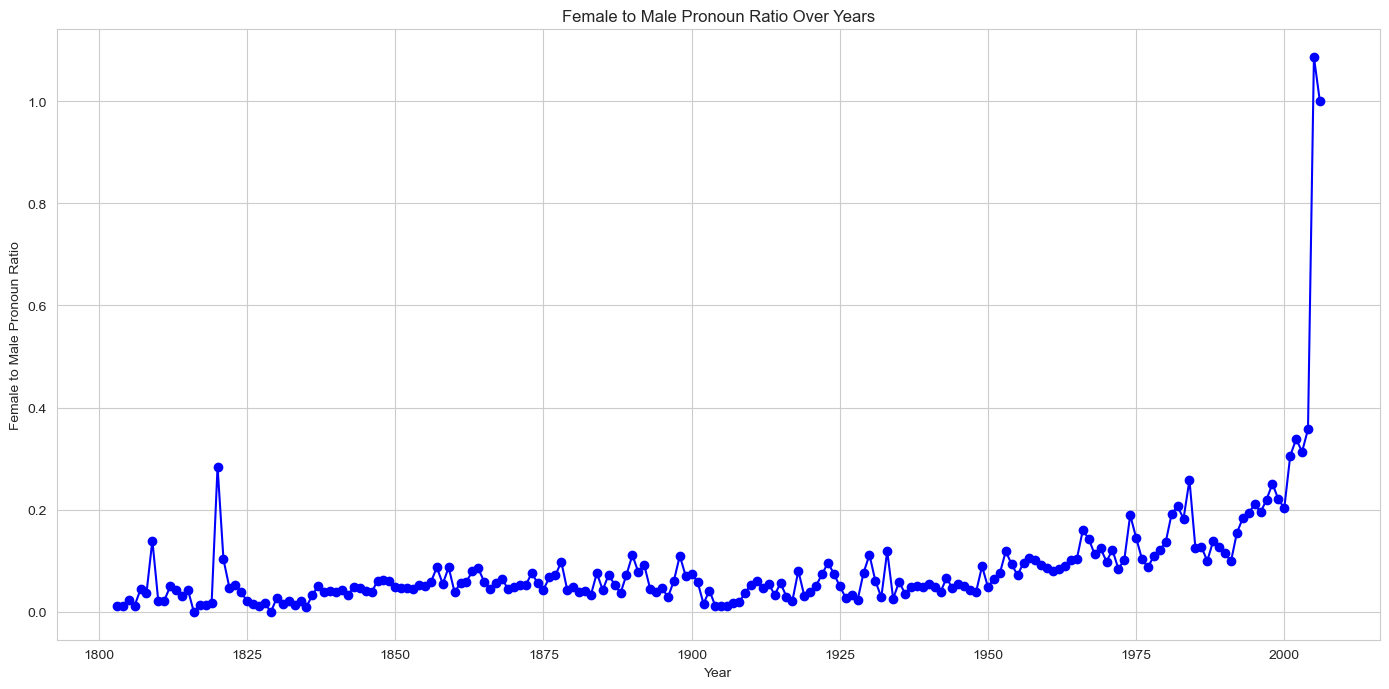

In [13]:
# Plotting the ratio
plt.figure(figsize=(14, 7))
plt.plot(df['Year'], df['Female_to_Male_Ratio'], marker='o', linestyle='-', color='blue')
plt.title('Female to Male Pronoun Ratio Over Years')
plt.xlabel('Year')
plt.ylabel('Female to Male Pronoun Ratio')
plt.grid(True)
plt.tight_layout()
plt.show()